In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, MAT, LinearAlgebra, MAT

In [3]:
x_joint = Vector(undef, 3);
H_joint = Vector(undef, 3);
CIs_joint = Vector(undef, 3);

In [4]:
x_choice = Vector(undef, 3);
H_choice = Vector(undef, 3);
CIs_choice = Vector(undef, 3);

In [5]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt = 1e-2
n, cross = 53, false
path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/data/hanks_data_sessions"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/data/hanks_data_sessions"

In [6]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/paper"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

## PPC

In [7]:
region, delay = "PPC", 12
ratnum = 6:8
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_PPC, = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [8]:
#file = joinpath(save_path, region*"_delay"*string(delay)*"_bounded_B_.mat")
file = joinpath(save_path, "PPC_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];  

In [9]:
x_joint[2] = xf;

In [10]:
joint_model_PPC = neural_choiceDDM(θneural_choice(xf, f), data_PPC, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((24,))
  n: Int64 53
  cross: Bool false


#### PPC choice

In [11]:
save_path_choice = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/choice/by_region_small"
file = joinpath(save_path_choice, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [12]:
using Flatten

In [13]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_PPC...), :input_data));
choice_data_PPC = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_PPC...), :choice));
choice_model_PPC = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[2]), data=choice_data_PPC, n=n, cross=cross);

In [14]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/paper"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

## STR

In [15]:
save_path

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

In [16]:
region, delay = "STR", 6
ratnum = 9:11
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_STR, = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [17]:
#file = joinpath(save_path, region*"_delay"*string(delay)*"_bounded_B_.mat")
file = joinpath(save_path, "STR_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   

In [18]:
x_joint[3] = xf;

In [19]:
xf

57-element Array{Float64,1}:
  21.739686031558488
  39.999999999994905
  -0.6655470594810599
 205.59046624824552
   0.07735575676466316
   0.001015746368916736
   0.01906351520949962
   0.23711213165800696
   0.054657917011082996
   1.7201961225067894
   1.100564430529128
   1.1988666753944297
   0.6758151905499695
   ⋮
  -0.10371743032257359
  -0.767247707424111
  -1.1446447945264462
  -0.7936534855759328
  -0.16495620293771868
  -0.34182304530941293
  -0.2382360283831809
   0.09991230566637119
  -1.3678001580142007
  -0.7507765292958776
  -1.4051663674016743
  -0.44987873126668565

In [20]:
sum(ncells)

48

In [21]:
joint_model_STR = neural_choiceDDM(θneural_choice(xf, f), data_STR, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((27,))
  n: Int64 53
  cross: Bool false


#### STR choice

In [22]:
save_path_choice = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/choice/by_region_small"
file = joinpath(save_path_choice, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [23]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_STR...), :input_data));
choice_data_STR = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_STR...), :choice));

In [24]:
choice_model_STR = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[3]), data=choice_data_STR, n=n, cross=cross);

## FOF

In [25]:
save_path

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

In [26]:
region, delay = "FOF", 6
ratnum = 1:5
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_FOF, = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [27]:
#file = joinpath(save_path, region*"_delay"*string(delay)*"_bounded_B_.mat")
file = joinpath(save_path, "FOF_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   

In [28]:
x_joint[1] = xf;

In [29]:
joint_model_FOF = neural_choiceDDM(θneural_choice(xf, f), data_FOF, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((46,))
  n: Int64 53
  cross: Bool false


In [30]:
save_path

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

#### FOF choice

In [31]:
file = joinpath(save_path_choice, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [32]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_FOF...), :input_data));
choice_data_FOF = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_FOF...), :choice));

In [33]:
choice_model_FOF = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[1]), data=choice_data_FOF, n=n, cross=cross);

In [34]:
using PyPlot

## Look at PSTHs

In [35]:
delay = 0

0

In [36]:
nconds = 2

2

In [37]:
using Colors
my_colors= map(x-> "#"*x, hex.(range(colorant"red", stop=colorant"green", length=nconds)));

In [38]:
import Statistics: mean

## FOF

- 13 cells for rat 1
- 10 cells for rat 2
- 12 cells for rat 3
- 32 cells for rat 4
- 1 cell for rat 5

In [39]:
ratnum = 1:5

1:5

In [41]:
rat = ratnames[ratnum]

5-element Array{String,1}:
 "B068"
 "T034"
 "T036"
 "T063"
 "T030"

In [42]:
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

In [43]:
data, μ_rnt_FOF, μ_t = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=1e-2, filtSD=5,
    do_RBF=true);
μ_t_FOF = vcat(μ_t...);

In [44]:
ncells = map(x-> x[1].ncells, data);
sum(ncells)

68

In [45]:
length(data)

46

In [46]:
ntrials = length.(data);

In [47]:
import Base.Iterators: partition

In [48]:
using Random, Distributions

In [49]:
output = process_spike_data.(μ_rnt_FOF, data; nconds=nconds);
μ_ct, σ_ct = getindex.(output, 1), getindex.(output, 2);
μ_ct_FOF, σ_ct_FOF = vcat(μ_ct...), vcat(σ_ct...);    

In [50]:
num_rows, num_cols = 17, 4

(17, 4)

In [51]:
f = repeat(["Softplus"], sum(ncells))
borg = vcat(0,cumsum(ncells))
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];

model_FOF = neuralDDM(θ=θneural(x_joint[1][setdiff(1:length(x_joint[1]), 8:9)], f), 
    data=data, n=n, cross=cross)

neuralDDM{θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1},θprior{Float64}}
  θ: θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((46,))
  n: Int64 53
  cross: Bool false
  θprior: θprior{Float64}


In [52]:
import pulse_input_DDM: simulate_expected_spikes

In [53]:
μ_λ_FOF, μ_c_λ, = simulate_expected_firing_rate(model_FOF; num_samples=20, nconds=nconds);
μ_c_λ_FOF = vcat(μ_c_λ...);

In [54]:
#μ_spikes_FOF, μ_c_spikes, = simulate_expected_spikes(model_FOF; num_samples=20, nconds=nconds);
#μ_c_spikes_FOF = vcat(μ_c_spikes...);
#μ_c_λ_FOF = pulse_input_DDM.filtered_rate.(μ_c_spikes_FOF, dt; filtSD=3, cut=0);

In [55]:
flatall = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_ct_FOF);

In [56]:
flatsim = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_c_λ_FOF);

In [57]:
meanall = mean.(flatall);

In [58]:
dataminusmean_all = map((x,y) -> x .- y, flatall, meanall);
theerror2 = map((x,y) -> x .- y, flatall, flatsim);

In [59]:
simR2_FOF = 1 .- sum.(map(x-> x.^2, theerror2)) ./ sum.(map(x-> x.^2, dataminusmean_all));

In [60]:
mean(simR2_FOF)

0.8482334441007712

In [61]:
median(simR2_FOF)

0.9091266600293446

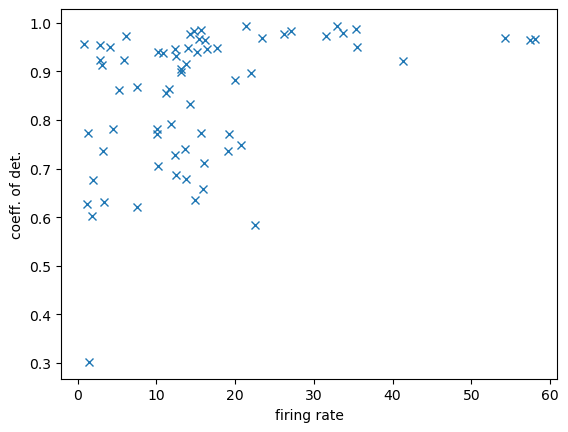

PyObject Text(24.000000000000007, 0.5, 'coeff. of det.')

In [62]:
#plot(mean.(μ_t_FOF), dataR2, label="data", "x")
plot(mean.(μ_t_FOF), simR2_FOF, label="sim", "x")
xlabel("firing rate")
ylabel("coeff. of det.")
#legend()

In [63]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=1e-2, centered=false), getfield.(vcat(data...), :input_data));
choice_data = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data...), :choice));
choice_FOF = getfield.(choice_data, :choice);

In [64]:
syn_choice_joint_FOF = rand.(Ref(Flatten.reconstruct(θchoice(), x_joint[1][1:9])), choice_inputs, 1:length(choice_inputs));
syn_choice_choice_FOF = rand.(Ref(Flatten.reconstruct(θchoice(), x_choice[1])), choice_inputs, 1:length(choice_inputs));

In [65]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_FOF = last.(cumsum.(-L .+ R));

In [66]:
using Optim, LineSearches, ForwardDiff, Distributions
w0 = [0.1, 1., 0.];

In [67]:
mylogit(w) = (w[1]/2 .+ (1 .- w[1]) ./ (1. .+ exp.(-w[2]*ΔLR_FOF .+ w[3])));
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), choice_FOF))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
m = BFGS(alphaguess = InitialStatic(alpha=1.0,scaled=true), linesearch = BackTracking());
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_data_FOF = Optim.minimizer(output);

In [68]:
x_FOF = sort(ΔLR_FOF);
idx_FOF = sortperm(ΔLR_FOF)
y_data_FOF = mylogit(what_data_FOF)[idx_FOF];

In [69]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_joint_FOF))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_joint_FOF = Optim.minimizer(output);

In [70]:
y_choice_joint_FOF = mylogit(what_choice_joint_FOF)[idx_FOF];

In [71]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_choice_FOF))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_choice_FOF = Optim.minimizer(output);
y_choice_choice_FOF = mylogit(what_choice_choice_FOF)[idx_FOF];

In [72]:
using HypothesisTests

In [73]:
using CategoricalArrays
labels = string.(1:10);

In [74]:
mylogit(w,x) = (w[1]/2 .+ (1 .- w[1]) ./ (1. .+ exp.(-w[2]*x .+ w[3])));

In [75]:
LR_FOF = map(x-> mean(ΔLR_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x]), labels);

In [76]:
ys_FOF_data = map(x-> choice_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x], labels);

In [77]:
CIs_data = collect.(confint.(BinomialTest.(ys_FOF_data, mylogit.(Ref(what_data_FOF), LR_FOF))));

In [78]:
ys_FOF_syn = map(x-> syn_choice_joint_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x], labels);

In [79]:
CIs_syn = collect.(confint.(BinomialTest.(ys_FOF_syn, mylogit.(Ref(what_choice_joint_FOF), LR_FOF))));

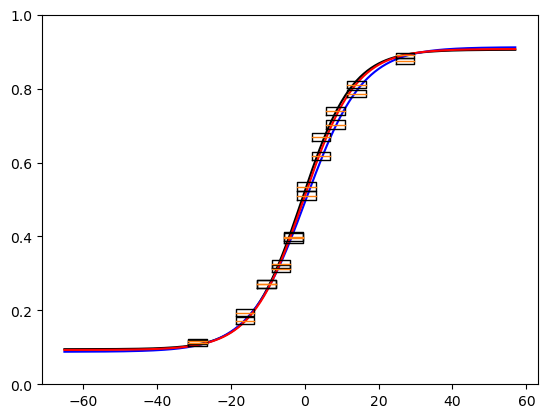

In [80]:
plot(x_FOF, y_data_FOF, label="data", color="black", LineStyle="-")
plot(x_FOF, y_choice_joint_FOF, label="joint", color="blue", LineStyle="-")
plot(x_FOF, y_choice_choice_FOF, label="choice", color="red", LineStyle="-")
boxplot(CIs_data, positions=LR_FOF, widths=5, notch=false, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
boxplot(CIs_syn, positions=LR_FOF, widths=5, notch=false, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
ylim(0,1);

## STR

Number of cells
- 6 cells for rat 9
- 38 cells for rat 10
- 4 cells for rat 11

In [81]:
ratnum = 9:11

9:11

In [82]:
delay

0

In [83]:
rat = ratnames[ratnum]

3-element Array{String,1}:
 "T080"
 "T103"
 "E021"

In [84]:
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

In [85]:
data, μ_rnt_STR, μ_t = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=1e-2, filtSD=5,
    do_RBF=true);

In [86]:
μ_t_STR = vcat(μ_t...);

In [87]:
ncells = map(x-> x[1].ncells, data);
sum(ncells)

48

In [88]:
length(data)

27

In [89]:
output = process_spike_data.(μ_rnt_STR, data; nconds=nconds);
μ_ct, σ_ct = getindex.(output, 1), getindex.(output, 2);
μ_ct_STR, σ_ct_STR = vcat(μ_ct...), vcat(σ_ct...);

In [90]:
f = repeat(["Softplus"], sum(ncells))
borg = vcat(0,cumsum(ncells))
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];

In [91]:
model_STR = neuralDDM(θ=θneural(x_joint[3][setdiff(1:length(x_joint[3]), 8:9)], f), 
    data=data, n=n, cross=cross)

neuralDDM{θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1},θprior{Float64}}
  θ: θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((27,))
  n: Int64 53
  cross: Bool false
  θprior: θprior{Float64}


In [92]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=1e-2, centered=false), getfield.(vcat(data...), :input_data));
choice_data = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data...), :choice));
choice_STR = getfield.(choice_data, :choice);

In [93]:
syn_choice_joint_STR = rand.(Ref(Flatten.reconstruct(θchoice(), x_joint[3][1:9])), choice_inputs, 1:length(choice_inputs));
syn_choice_choice_STR = rand.(Ref(Flatten.reconstruct(θchoice(), x_choice[3])), choice_inputs, 1:length(choice_inputs));

In [94]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_STR = last.(cumsum.(-L .+ R));

In [95]:
mylogit(w) = (w[1]/2 .+ (1 .- w[1]) ./ (1. .+ exp.(-w[2]*ΔLR_STR .+ w[3])));
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), choice_STR))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_data_STR = Optim.minimizer(output);

In [96]:
x_STR = sort(ΔLR_STR);
idx_STR = sortperm(ΔLR_STR)
y_data_STR = mylogit(what_data_STR)[idx_STR];

In [97]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_joint_STR))
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_joint_STR = Optim.minimizer(output);

In [98]:
y_choice_joint_STR = mylogit(what_choice_joint_STR)[idx_STR];

In [99]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_choice_STR))
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_choice_STR = Optim.minimizer(output);

y_choice_choice_STR = mylogit(what_choice_choice_STR)[idx_STR];

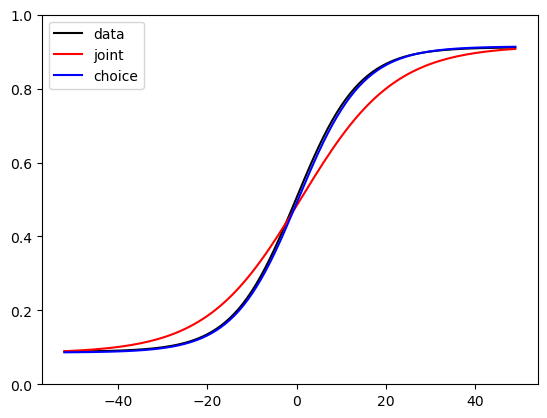

PyObject <matplotlib.legend.Legend object at 0x7fa3f8251da0>

In [100]:
plot(x_STR, y_data_STR, label="data", color="black", LineStyle="-")
plot(x_STR, y_choice_joint_STR, label="joint", color="red", LineStyle="-")
plot(x_STR, y_choice_choice_STR, label="choice", color="blue", LineStyle="-")
ylim(0,1);
legend()

In [101]:
dataminusmean_all = y_data_STR .- mean(y_data_STR);
theerror2 = map((x,y) -> x .- y, flatall, flatsim);

1 .- sum((y_data_STR .- y_choice_joint_STR).^2) / sum((y_data_STR .- mean(y_data_STR)).^2)

0.9651034752959451

##### simulate

In [102]:
μ_λ_STR, μ_c_λ, = simulate_expected_firing_rate(model_STR; num_samples=20, nconds=nconds); 
μ_c_λ_STR = vcat(μ_c_λ...);

In [103]:
#μ_spikes_STR, μ_c_spikes, = simulate_expected_spikes(model_STR; num_samples=20, nconds=nconds);
#μ_c_spikes_STR = vcat(μ_c_spikes...);
#μ_c_λ_STR = pulse_input_DDM.filtered_rate.(μ_c_spikes_STR, dt; filtSD=3, cut=0);

flatall = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_ct_STR);
flatsim = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_c_λ_STR);

meanall = mean.(flatall);

dataminusmean_all = map((x,y) -> x .- y, flatall, meanall);
theerror2 = map((x,y) -> x .- y, flatall, flatsim);

simR2_STR = 1 .- sum.(map(x-> x.^2, theerror2)) ./ sum.(map(x-> x.^2, dataminusmean_all))

48-element Array{Float64,1}:
 0.8623770274138054
 0.9008689050448301
 0.7053205033319911
 0.9445235078603446
 0.8452195392806892
 0.9753220423405031
 0.2617301685541771
 0.8807341499596032
 0.6416784025194406
 0.988824287052414
 0.9724466180386552
 0.7226074714206574
 0.904331252209571
 ⋮
 0.8569233329318985
 0.7726734422592583
 0.5259676691640924
 0.0946641345038085
 0.7453101530783095
 0.571466374324197
 0.90042476702954
 0.8914339199788965
 0.745256001462688
 0.9695628297956872
 0.9143221140361675
 0.800394948520495

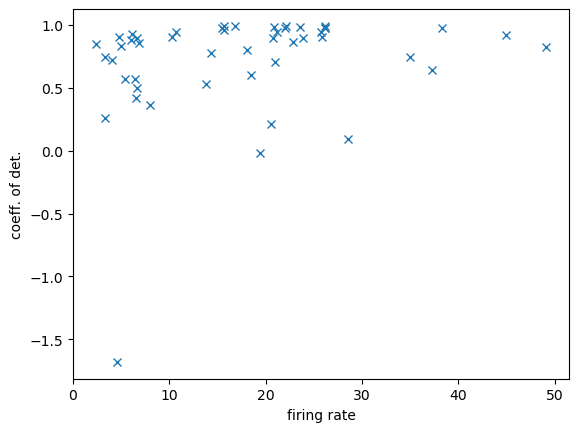

PyObject Text(24.000000000000007, 0.5, 'coeff. of det.')

In [104]:
#plot(mean.(μ_t_FOF), dataR2, label="data", "x")
plot(mean.(μ_t_STR), simR2_STR, label="sim", "x")
xlabel("firing rate")
ylabel("coeff. of det.")
#legend()

In [105]:
median(simR2_STR)

0.8715555886867044

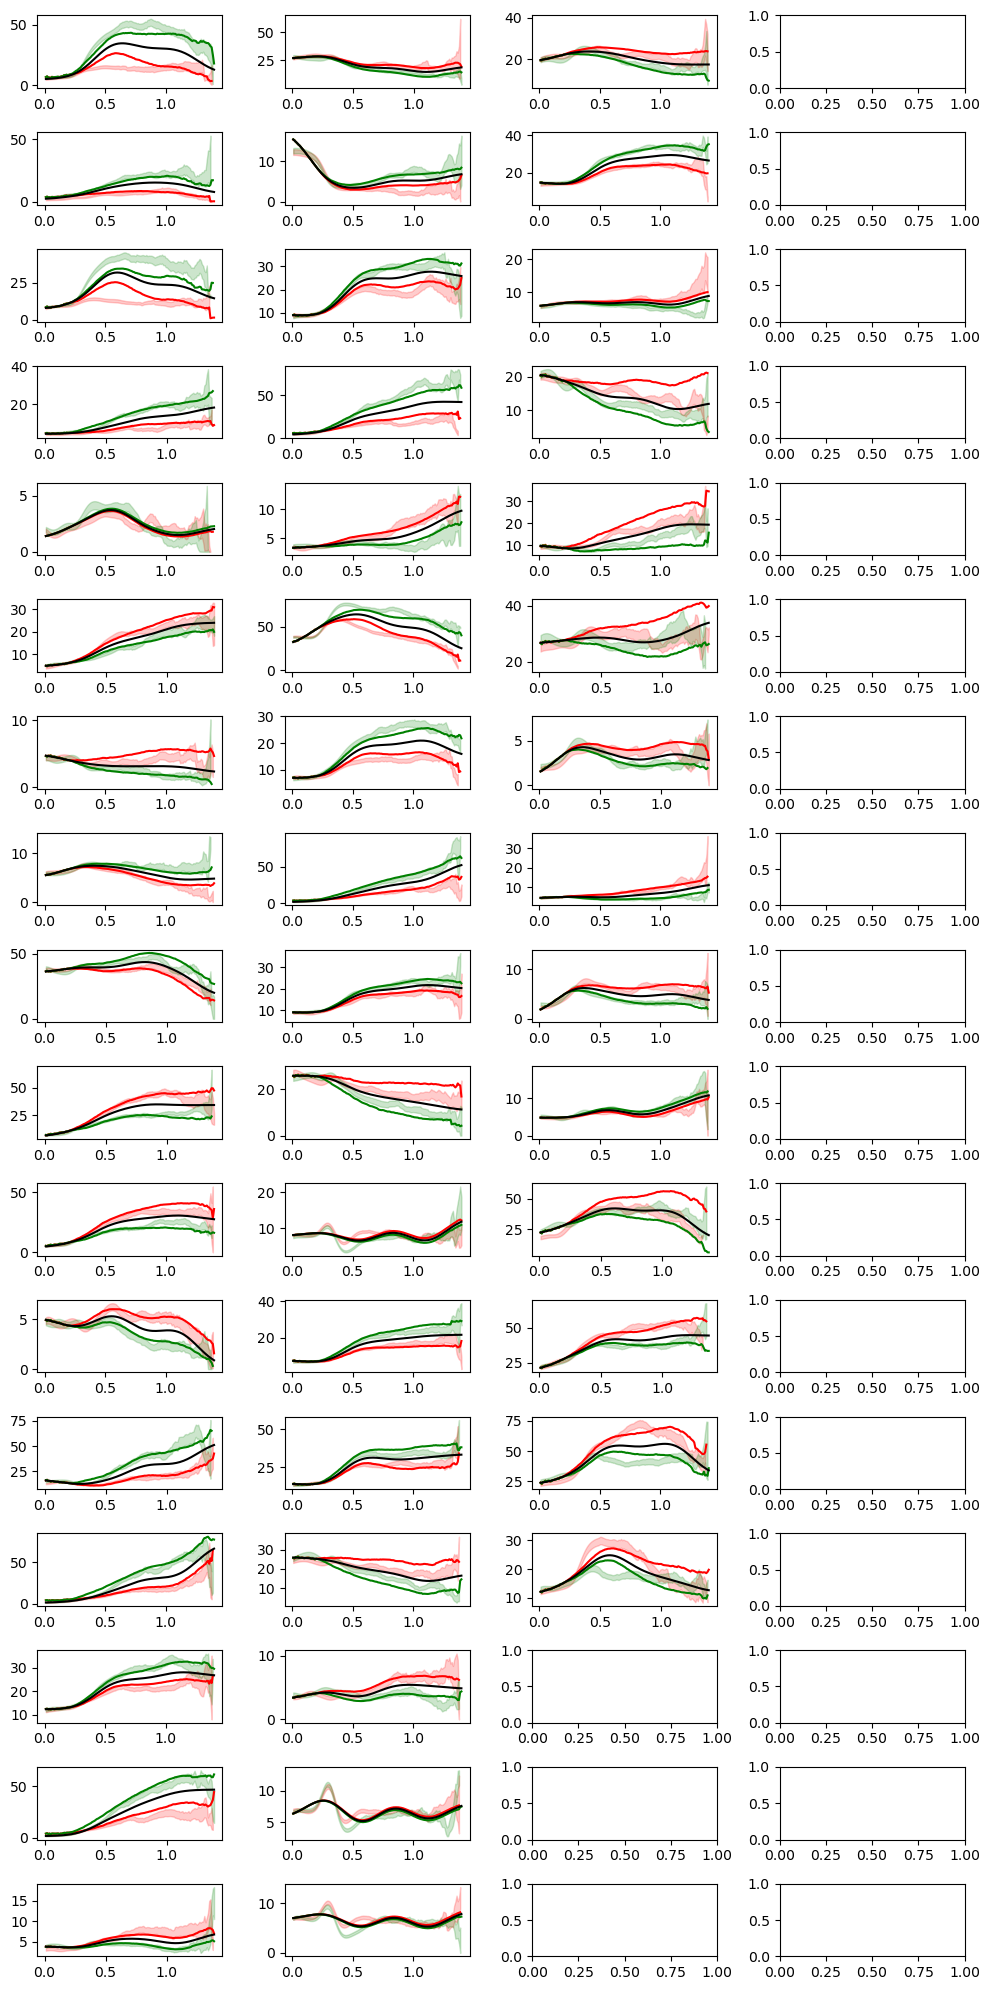

In [106]:
toplot = 1:48

fig, ax = subplots(num_rows, num_cols, figsize=(10,20))

for j in 1:length(toplot)  

    for k = 1:nconds   

        ax[j].fill_between((1:length(μ_ct_STR[toplot[j]][k]))*dt,
            μ_ct_STR[toplot[j]][k] + σ_ct_STR[toplot[j]][k],
            μ_ct_STR[toplot[j]][k] - σ_ct_STR[toplot[j]][k],
            alpha=0.2, color=my_colors[k]) 
        
        ax[j].plot((1:length(μ_c_λ_STR[toplot[j]][k]))*dt,
            μ_c_λ_STR[toplot[j]][k], color=my_colors[k])  

    end   

    ax[j].plot((1:length(μ_t_STR[toplot[j]]))*dt,
       μ_t_STR[toplot[j]], color="black")            

end

tight_layout() 

## PPC

In [107]:
delay 

0

In [108]:
ratnum = 6:8
rat = ratnames[ratnum]

3-element Array{String,1}:
 "T035"
 "T011"
 "B053"

In [109]:
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);
data, μ_rnt_PPC, μ_t_PPC = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=1e-2, filtSD=5,
    do_RBF=true);

In [110]:
μ_t_PPC = vcat(μ_t_PPC...);
ncells = map(x-> x[1].ncells, data);
sum(ncells)

25

In [111]:
length(data)

24

In [112]:
output = process_spike_data.(μ_rnt_PPC, data; nconds=nconds);
μ_ct, σ_ct = getindex.(output, 1), getindex.(output, 2);
μ_ct_PPC, σ_ct_PPC = vcat(μ_ct...), vcat(σ_ct...);

In [113]:
f = repeat(["Softplus"], sum(ncells))
borg = vcat(0,cumsum(ncells))
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];

In [114]:
model_PPC = neuralDDM(θ=θneural(x_joint[2][setdiff(1:length(x_joint[2]), 8:9)], f), 
    data=data, n=n, cross=cross)

neuralDDM{θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1},θprior{Float64}}
  θ: θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((24,))
  n: Int64 53
  cross: Bool false
  θprior: θprior{Float64}


In [115]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=1e-2, centered=false), getfield.(vcat(data...), :input_data));
choice_data = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data...), :choice));

In [116]:
choice_PPC = getfield.(choice_data, :choice);

In [117]:
syn_choice_joint_PPC = rand.(Ref(Flatten.reconstruct(θchoice(), x_joint[2][1:9])), choice_inputs, 1:length(choice_inputs));

In [118]:
syn_choice_choice_PPC = rand.(Ref(Flatten.reconstruct(θchoice(), x_choice[2])), choice_inputs, 1:length(choice_inputs));

In [119]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_PPC = last.(cumsum.(-L .+ R));

In [120]:
mylogit(w) = (w[1]/2 .+ (1 .- w[1]) ./ (1. .+ exp.(-w[2]*ΔLR_PPC .+ w[3])));

In [121]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), choice_PPC))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
m = BFGS(alphaguess = InitialStatic(alpha=1.0,scaled=true), linesearch = BackTracking());
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_data_PPC = Optim.minimizer(output);

In [122]:
x_PPC = sort(ΔLR_PPC);
idx_PPC = sortperm(ΔLR_PPC)
y_data_PPC = mylogit(what_data_PPC)[idx_PPC];

In [123]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_joint_PPC))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_joint_PPC = Optim.minimizer(output);

In [124]:
y_choice_joint_PPC = mylogit(what_choice_joint_PPC)[idx_PPC];

In [125]:
ll(w) = -1 * sum(logpdf.(Bernoulli.(vec(mylogit(w))), syn_choice_choice_PPC))
obj = OnceDifferentiable(ll, w0; autodiff=:forward)
output = Optim.optimize(obj, [0, -Inf, -Inf], [1., Inf, Inf], w0, Fminbox(m));
what_choice_choice_PPC = Optim.minimizer(output);

y_choice_choice_PPC = mylogit(what_choice_choice_PPC)[idx_PPC];

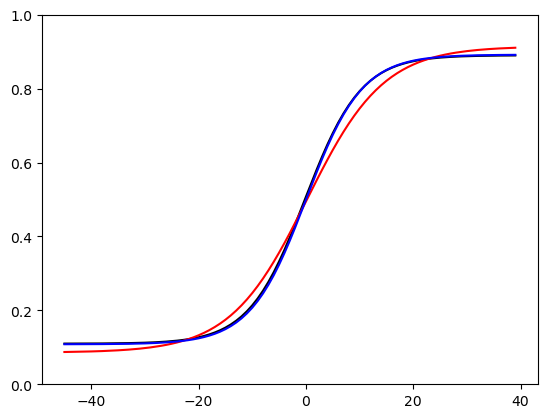

In [126]:
plot(x_PPC, y_data_PPC, label="data", color="black", LineStyle="-")
plot(x_PPC, y_choice_joint_PPC, label="joint", color="red", LineStyle="-")
plot(x_PPC, y_choice_choice_PPC, label="choice", color="blue", LineStyle="-")
ylim(0,1);

##### simulate

In [127]:
μ_λ_PPC, μ_c_λ, = simulate_expected_firing_rate(model_PPC; num_samples=20, nconds=nconds); 
μ_c_λ_PPC = vcat(μ_c_λ...);

In [128]:
#μ_spikes_PPC, μ_c_spikes, = simulate_expected_spikes(model_PPC; num_samples=20, nconds=nconds);
#μ_c_spikes_PPC = vcat(μ_c_spikes...);
#μ_c_λ_PPC = pulse_input_DDM.filtered_rate.(μ_c_spikes_PPC, dt; filtSD=3, cut=0);

flatall = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_ct_PPC);
flatsim = map(x-> vcat(map(x-> getindex(x, 1:70), x)...), μ_c_λ_PPC);

meanall = mean.(flatall);

dataminusmean_all = map((x,y) -> x .- y, flatall, meanall);
theerror2 = map((x,y) -> x .- y, flatall, flatsim);

simR2_PPC = 1 .- sum.(map(x-> x.^2, theerror2)) ./ sum.(map(x-> x.^2, dataminusmean_all))

25-element Array{Float64,1}:
 -11.328147881604115
   0.876607710386485
   0.1479727579923531
  -4.0219426031820475
   0.4138771609538494
   0.7659160098475626
   0.6710124724194289
   0.739760624910384
   0.6053336145363067
   0.8827241471818605
  -3.6839335595717744
   0.6004849450880984
   0.831817878278883
   0.9282427642493274
   0.6805215347567899
  -0.407944808010537
   0.7812096324760087
   0.7528495620834291
   0.43822547490367325
   0.8823143716103891
   0.890101393119892
   0.8412679059160078
   0.5133609872942875
   0.9255488959055973
  -0.41031963882133726

In [129]:
findall(simR2_PPC .< 0)

5-element Array{Int64,1}:
  1
  4
 11
 16
 25

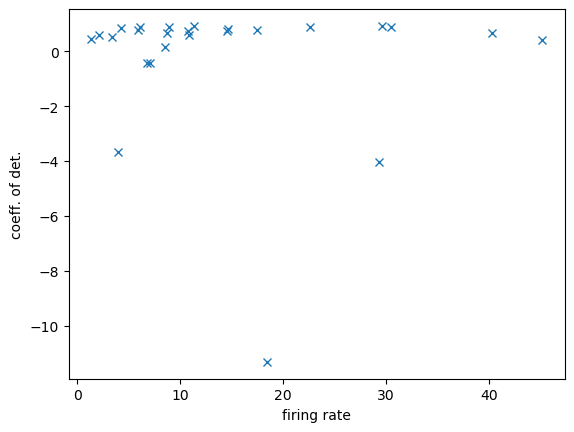

PyObject Text(24.000000000000007, 0.5, 'coeff. of det.')

In [130]:
#plot(mean.(μ_t_FOF), dataR2, label="data", "x")
plot(mean.(μ_t_PPC), simR2_PPC, label="sim", "x")
xlabel("firing rate")
ylabel("coeff. of det.")
#legend()

In [131]:
median(simR2_PPC)

0.6805215347567899

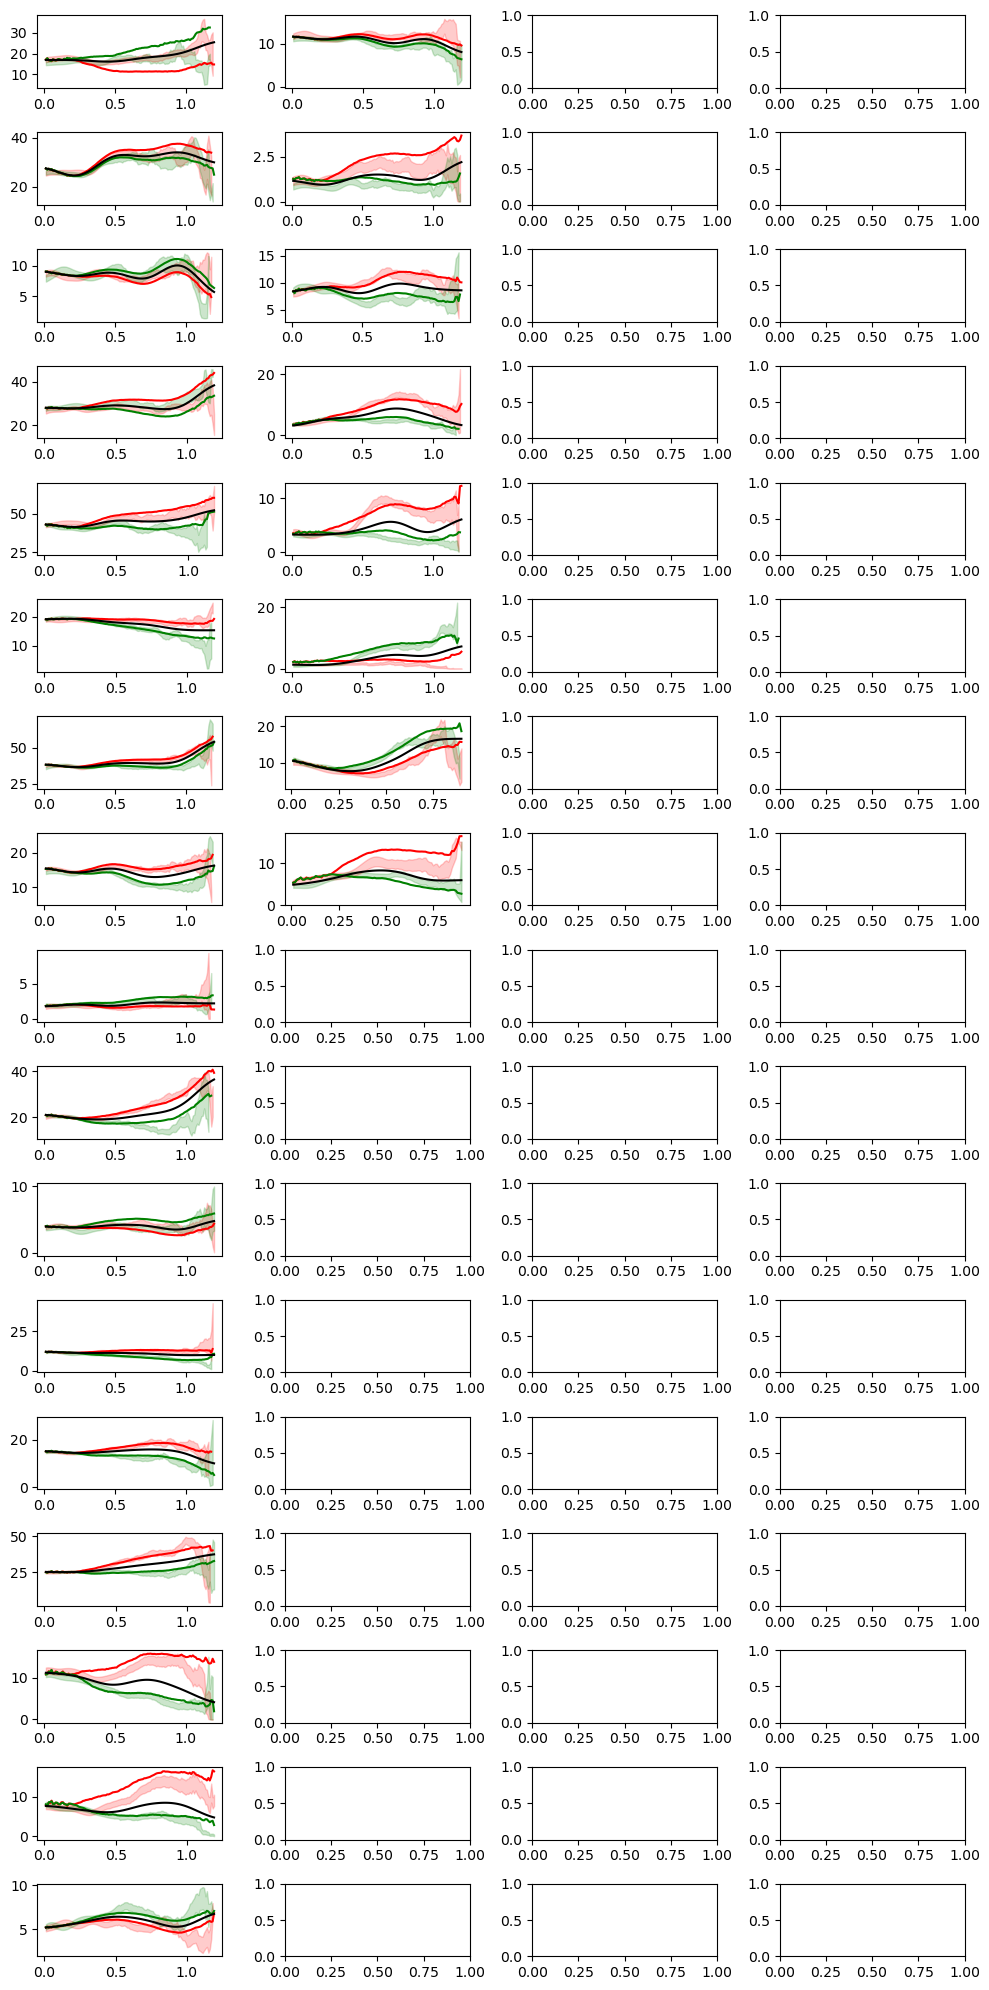

In [132]:
toplot = 1:25

fig, ax = subplots(num_rows, num_cols, figsize=(10,20))

for j in 1:length(toplot)  

    for k = 1:nconds   

        ax[j].fill_between((1:length(μ_ct_PPC[toplot[j]][k]))*dt,
            μ_ct_PPC[toplot[j]][k] + σ_ct_PPC[toplot[j]][k],
            μ_ct_PPC[toplot[j]][k] - σ_ct_PPC[toplot[j]][k],
            alpha=0.2, color=my_colors[k]) 
        
        ax[j].plot((1:length(μ_c_λ_PPC[toplot[j]][k]))*dt,
            μ_c_λ_PPC[toplot[j]][k], color=my_colors[k])  

    end   

    ax[j].plot((1:length(μ_t_PPC[toplot[j]]))*dt,
       μ_t_PPC[toplot[j]], color="black")            

end
tight_layout() 

#### % correct

In [133]:
mean((2 * vcat(choice_PPC, choice_FOF, choice_STR) .- 1) .== sign.(vcat(ΔLR_PPC, ΔLR_FOF, ΔLR_STR)))

0.7399069367115845

In [134]:
median(simR2_FOF)

0.9091266600293446

In [135]:
median(simR2_PPC)

0.6805215347567899

In [136]:
median(simR2_STR)

0.8715555886867044

## All plots

In [137]:
my_colors_STR= map(x-> "#"*x, hex.(range(colorant"#A01892", stop=colorant"#E9E62F", length=nconds)));

In [138]:
my_colors_PPC= map(x-> "#"*x, hex.(range(colorant"#1822A0", stop=colorant"#E99C2F", length=nconds)));

In [139]:
my_colors_FOF= map(x-> "#"*x, hex.(range(colorant"red", stop=colorant"green", length=nconds)));

In [140]:
#my_colors_PPC = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#my_colors_STR = ["#A01892","#B85C71","#D0A150","#E9E62F"]

In [141]:
import Statistics: median

In [142]:
findall((simR2_FOF .> 0.6) .& (simR2_FOF .< 0.7))

9-element Array{Int64,1}:
  5
 23
 25
 37
 39
 40
 55
 65
 66

In [143]:
findall((simR2_STR .> 0.6) .& (simR2_STR .< 0.7))

1-element Array{Int64,1}:
 9

In [144]:
findall((simR2_PPC .> 0.6) .& (simR2_PPC .< 0.7))

4-element Array{Int64,1}:
  7
  9
 12
 15

## Binned choices

In [145]:
using HypothesisTests
using CategoricalArrays
labels = string.(1:10);

In [146]:
mylogit(w,x) = (w[1]/2 .+ (1 .- w[1]) ./ (1. .+ exp.(-w[2]*x .+ w[3])));

In [147]:
LR_FOF = map(x-> mean(ΔLR_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x]), labels);
ys_FOF_data = map(x-> choice_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x], labels);
CIs_data = collect.(confint.(BinomialTest.(ys_FOF_data, mylogit.(Ref(what_data_FOF), LR_FOF))));
ys_FOF_syn = map(x-> syn_choice_joint_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x], labels);
CIs_syn = collect.(confint.(BinomialTest.(ys_FOF_syn, mylogit.(Ref(what_choice_joint_FOF), LR_FOF))));

In [148]:
LR_PPC = map(x-> mean(ΔLR_PPC[cut(ΔLR_PPC, length(labels), labels=labels) .== x]), labels);
ys_PPC_data = map(x-> choice_PPC[cut(ΔLR_PPC, length(labels), labels=labels) .== x], labels);
CIs_data_PPC = collect.(confint.(BinomialTest.(ys_PPC_data, mylogit.(Ref(what_data_PPC), LR_PPC))));
#ys_FOF_syn = map(x-> syn_choice_joint_FOF[cut(ΔLR_FOF, length(labels), labels=labels) .== x], labels);
#CIs_syn = collect.(confint.(BinomialTest.(ys_FOF_syn, mylogit.(Ref(what_choice_joint_FOF), LR_FOF))));

In [149]:
LR_STR = map(x-> mean(ΔLR_STR[cut(ΔLR_STR, length(labels), labels=labels) .== x]), labels);
ys_STR_data = map(x-> choice_STR[cut(ΔLR_STR, length(labels), labels=labels) .== x], labels);
CIs_data_STR = collect.(confint.(BinomialTest.(ys_STR_data, mylogit.(Ref(what_data_STR), LR_STR))));

## Plot

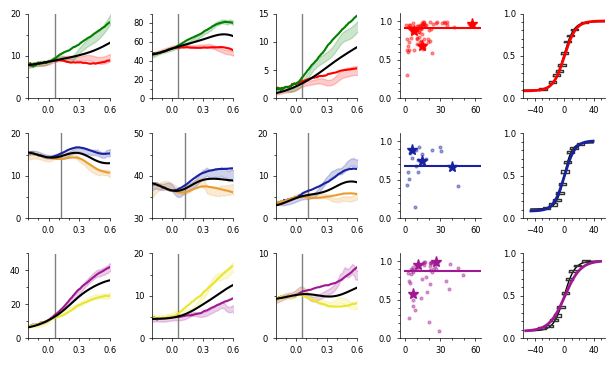

In [151]:
#toplot = [8,15,21]
toplot = [8,7,21]
toplotPPC = toplot

#toplotPPC = sortperm(R2_PPC)[end-2:end]
#toplot = sortperm(R2_PPC)[end-2:end]

fs = 6

rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)
rc("font", family="sans-serif")

fig, ax = subplots(3, 5, figsize=(1.25 * 5, 1.25 * 3))

idxs = [2,5,8]

for j in 1:length(toplot) 
    
    if j == 1
        ax[idxs[j]].plot(0.12*ones(100), range(0, stop=20, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 2
        ax[idxs[j]].plot(0.12*ones(100), range(0, stop=60, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 3
        ax[idxs[j]].plot(0.12*ones(100), range(0, stop=20, length=100), color=[0.5,0.5,0.5], LineStyle="-", 
            LineWidth=1)
    end

    for k = 1:nconds   

        ax[idxs[j]].fill_between((1:length(μ_ct_PPC[toplot[j]][k]))*dt .-0.2,
            μ_ct_PPC[toplot[j]][k] + σ_ct_PPC[toplot[j]][k],
            μ_ct_PPC[toplot[j]][k] - σ_ct_PPC[toplot[j]][k],
            alpha=0.2, color=my_colors_PPC[k]) 
        
        ax[idxs[j]].plot((1:length(μ_c_λ_PPC[toplot[j]][k]))*dt.-0.2,
            μ_c_λ_PPC[toplot[j]][k], color=my_colors_PPC[k])  

    end   

    ax[idxs[j]].plot((1:length(μ_t_PPC[toplot[j]]))*dt .-0.2,
       μ_t_PPC[toplot[j]], color="black") 
    
    ax[idxs[j]].spines["right"].set_visible(false)
    ax[idxs[j]].spines["top"].set_visible(false)
    ax[idxs[j]].spines["bottom"].set_linewidth(0.5)
    ax[idxs[j]].spines["left"].set_linewidth(0.5)
    #ax[idxs[j]].set_yticks(range(0., 1., length=5))    
    #ax[idxs[j]].set_yticks(range(0., 1., length=5))    
    ax[idxs[j]].tick_params(width=0.5, length=2)
    #ax[j].set_yticks(range(0, stop=1, length=6))
    #ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
    ax[idxs[j]].set_xticks(range(0., stop=0.6, length=3))
    ax[idxs[j]].set_xticks(range(-0.2, stop=0.6, length=9), minor=true)
    ax[idxs[j]].tick_params(which="minor", width=0.5, length=1.5)
    
    ax[idxs[j]].set_xlim(-0.2, 0.6)
    #ax[idxs[j]].set_xticks([0.,0.2,0.4,0.6])
    ax[idxs[j]].set_ylim(0., ax[idxs[j]].get_ylim()[2])
    #ax[idxs[j]].set_xlabel("time (s)", fontsize=fs)
    #if (j == 1)
    #    ax[idxs[j]].set_ylabel("firing rate (sp/s)", fontsize=fs)
    #end
    
    if j == 1
        ax[idxs[j]].set_ylim(0., 20.)
        ax[idxs[j]].set_yticks(range(0, stop=20, length=3))
        ax[idxs[j]].set_yticks(range(0, stop=20, length=5), minor=true)
    elseif j == 2
        #ax[idxs[j]].set_ylim(0., 60.)
        #ax[idxs[j]].set_yticks(range(0, stop=60, length=3))
        #ax[idxs[j]].set_yticks(range(0, stop=60, length=5), minor=true)
        ax[idxs[j]].set_ylim(30., 50.)
        ax[idxs[j]].set_yticks(range(30, stop=50, length=3))
        ax[idxs[j]].set_yticks(range(30, stop=50, length=5), minor=true)
    elseif j == 3
        ax[idxs[j]].set_ylim(0., 20.)
        ax[idxs[j]].set_yticks(range(0, stop=20, length=3))
        ax[idxs[j]].set_yticks(range(0, stop=20, length=5), minor=true)
    end

end

#toplot = [10,4,20]
toplot = [10,4,42]
toplotSTR = toplot

#toplotSTR = sortperm(R2_STR)[end-2:end]
#toplot = sortperm(R2_STR)[end-2:end]

idxs = [3,6,9]

for j in 1:length(toplot)  
    
    if j == 1
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=50, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 2
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=20, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 3
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=32, length=100), color=[0.5,0.5,0.5], LineStyle="-", 
            LineWidth=1)
    end

    for k = 1:nconds   

        ax[idxs[j]].fill_between((1:length(μ_ct_STR[toplot[j]][k]))*dt .- 0.2,
            μ_ct_STR[toplot[j]][k] + σ_ct_STR[toplot[j]][k],
            μ_ct_STR[toplot[j]][k] - σ_ct_STR[toplot[j]][k],
            alpha=0.2, color=my_colors_STR[k]) 
        
        ax[idxs[j]].plot((1:length(μ_c_λ_STR[toplot[j]][k]))*dt .- 0.2,
            μ_c_λ_STR[toplot[j]][k], color=my_colors_STR[k])  

    end   

    ax[idxs[j]].plot((1:length(μ_t_STR[toplot[j]]))*dt .- 0.2,
       μ_t_STR[toplot[j]], color="black")  
    
    ax[idxs[j]].spines["right"].set_visible(false)
    ax[idxs[j]].spines["top"].set_visible(false)
    ax[idxs[j]].spines["bottom"].set_linewidth(0.5)
    ax[idxs[j]].spines["left"].set_linewidth(0.5)
    #ax[idxs[j]].set_yticks(range(0., 1., length=5))    
    ax[idxs[j]].tick_params(width=0.5, length=2)
    #ax[j].set_yticks(range(0, stop=1, length=6))
    #ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
    ax[idxs[j]].set_xticks(range(0., stop=0.6, length=3))
    ax[idxs[j]].set_xticks(range(-0.2, stop=0.6, length=9), minor=true)
    ax[idxs[j]].tick_params(which="minor", width=0.5, length=1.5)
    
    ax[idxs[j]].set_xlim(-0.2, 0.6)
    #ax[idxs[j]].set_xticks([0.,0.2,0.4,0.6])
    ax[idxs[j]].set_ylim(0., ax[idxs[j]].get_ylim()[2])
    #ax[idxs[j]].set_xlabel("time (s)", fontsize=fs)
    #if (j == 1)
    #    ax[idxs[j]].set_ylabel("firing rate (sp/s)", fontsize=fs)
    #end
    
    if j == 1
        ax[idxs[j]].set_ylim(0., 50.)
        ax[idxs[j]].set_yticks(range(0, stop=40, length=3))
        ax[idxs[j]].set_yticks(range(0, stop=50, length=6), minor=true)
    elseif j == 2
        ax[idxs[j]].set_ylim(0., 20.)
        ax[idxs[j]].set_yticks(range(0, stop=20, length=3))
        ax[idxs[j]].set_yticks(range(0, stop=20, length=5), minor=true)
    elseif j == 3
        #ax[idxs[j]].set_ylim(0., 32.)
        #ax[idxs[j]].set_yticks(range(0, stop=30, length=4))
        #ax[idxs[j]].set_yticks(range(0, stop=30, length=7), minor=true)
        ax[idxs[j]].set_ylim(0., 10.)
        ax[idxs[j]].set_yticks(range(0, stop=10, length=2))
        ax[idxs[j]].set_yticks(range(0, stop=10, length=3), minor=true)
    end

end

#toplotFOF = sortperm(R2_FOF)[end-2:end]
#toplot = sortperm(R2_FOF)[end-2:end]

#toplot = [7,33,52]
toplot = [39, 33, 52]
toplotFOF = toplot

idxs = [1,4,7]

for j in 1:length(toplot) 
    
    if j == 1
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=50, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 2
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=90, length=100), color=[0.5,0.5,0.5], LineStyle="-",
            LineWidth=1)
    elseif j == 3
        ax[idxs[j]].plot(0.06*ones(100), range(0, stop=15, length=100), color=[0.5,0.5,0.5], LineStyle="-", 
            LineWidth=1)
    end

    for k = 1:nconds   

        ax[idxs[j]].fill_between((1:length(μ_ct_FOF[toplot[j]][k]))*dt .- 0.2,
            μ_ct_FOF[toplot[j]][k] + σ_ct_FOF[toplot[j]][k],
            μ_ct_FOF[toplot[j]][k] - σ_ct_FOF[toplot[j]][k],
            alpha=0.2, color=my_colors_FOF[k]) 
        
        ax[idxs[j]].plot((1:length(μ_c_λ_FOF[toplot[j]][k]))*dt .- 0.2,
            μ_c_λ_FOF[toplot[j]][k], color=my_colors_FOF[k])  

    end   

    ax[idxs[j]].plot((1:length(μ_t_FOF[toplot[j]]))*dt .- 0.2,
       μ_t_FOF[toplot[j]], color="black")  
    
    ax[idxs[j]].set_xlim(-0.2, 0.6)
    ax[idxs[j]].set_ylim(0., ax[idxs[j]].get_ylim()[2])
    #ax[idxs[j]].set_xticks([0.,0.2,0.4,0.6])
    #ax[idxs[j]].set_xlabel("time (s)", fontsize=fs)
    #if (j == 1)
    #    ax[idxs[j]].set_ylabel("firing rate (sp/s)", fontsize=fs)
    #end
    
    ax[idxs[j]].spines["right"].set_visible(false)
    ax[idxs[j]].spines["top"].set_visible(false)
    ax[idxs[j]].spines["bottom"].set_linewidth(0.5)
    ax[idxs[j]].spines["left"].set_linewidth(0.5)
    #ax[idxs[j]].set_yticks(range(0., 1., length=5))    
    ax[idxs[j]].tick_params(width=0.5, length=2)
    ax[idxs[j]].set_xticks(range(0., stop=0.6, length=3))
    ax[idxs[j]].set_xticks(range(-0.2, stop=0.6, length=9), minor=true)
    ax[idxs[j]].tick_params(which="minor", width=0.5, length=1.5)
    #ax[j].set_ylim(0, 1)
    #ax[j].set_xlim(-55, 55)
    
    if j == 1
        #ax[idxs[j]].set_ylim(0., 50.)
        #ax[idxs[j]].set_yticks(range(0, stop=40, length=3))
        #ax[idxs[j]].set_yticks(range(0, stop=50, length=6), minor=true)
        ax[idxs[j]].set_ylim(0., 20.)
        ax[idxs[j]].set_yticks(range(0, stop=20, length=3))
        ax[idxs[j]].set_yticks(range(0, stop=20, length=5), minor=true)
    elseif j == 2
        ax[idxs[j]].set_ylim(0., 90.)
        ax[idxs[j]].set_yticks(range(0, stop=80, length=5))
        ax[idxs[j]].set_yticks(range(0, stop=90, length=10), minor=true)
    elseif j == 3
        ax[idxs[j]].set_ylim(0., 15.)
        ax[idxs[j]].set_yticks(range(0, stop=15, length=4))
        ax[idxs[j]].set_yticks(range(0, stop=15, length=4), minor=true)
    end

end

ax[11].plot(mean.(μ_t_PPC), simR2_PPC, ".", color="#1822A0", markersize=4, alpha=0.4)
ax[11].plot(mean.(μ_t_PPC)[toplotPPC], simR2_PPC[toplotPPC], "*", color="#1822A0", markersize=8)
ax[11].plot(range(0., stop=65,length=100), median(simR2_PPC)*ones(100), color="#1822A0")
ax[11].set_ylim(0., 1.0)

ax[12].plot(mean.(μ_t_STR), simR2_STR, ".", color="#A01892", markersize=4, alpha=0.4)
ax[12].plot(mean.(μ_t_STR)[toplotSTR], simR2_STR[toplotSTR], "*", color="#A01892", markersize=8)
ax[12].set_ylim(0., 1.0)
ax[12].plot(range(0., stop=65,length=100), median(simR2_STR)*ones(100), color="#A01892")

ax[10].plot(mean.(μ_t_FOF), simR2_FOF, ".", color="red", markersize=4, alpha=0.4)
ax[10].plot(mean.(μ_t_FOF)[toplotFOF], simR2_FOF[toplotFOF], "*", color="red", markersize=8)
ax[10].set_ylim(0., 1.0)
ax[10].plot(range(0., stop=65,length=100), median(simR2_FOF)*ones(100), color="red")
#[ax[i].set_xlabel("firing rate (sp/s)", fontsize=fs) for i in 12:12]
#[ax[i].set_ylabel("R2", fontsize=fs) for i in 10:12]
[ax[i].set_yticks(range(0, stop=1., length=3)) for i in 10:12]

for j = 10:12
    ax[j].spines["right"].set_visible(false)
    ax[j].spines["top"].set_visible(false)
    ax[j].spines["bottom"].set_linewidth(0.5)
    ax[j].spines["left"].set_linewidth(0.5)
    #ax[idxs[j]].set_yticks(range(0., 1., length=5))    
    ax[j].tick_params(width=0.5, length=2)
    ax[j].set_yticks(range(0, stop=1, length=3))
    ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
    ax[j].set_xticks(range(0, stop=60, length=3))
    ax[j].set_xticks(range(0, stop=60, length=7), minor=true)
    ax[j].tick_params(which="minor", width=0.5, length=1.5)
    ax[j].set_ylim(0, 1.1)
    ax[j].set_xlim(-5, 65)
end

j = 13
#ax[j].plot(x_FOF, 1 .- getindex(x_joint_bound[1], 9) * ones(length(x_FOF)), color="black", LineStyle=":")
#ax[j].plot(x_FOF, getindex(x_joint_bound[1], 9) * ones(length(x_FOF)), color="black", LineStyle=":")
#ax[j].plot(x_FOF, 1 .- getindex(x_choice_bound[1], 9) * ones(length(x_FOF)), color="black", LineStyle=":")
#ax[j].plot(x_FOF, getindex(x_choice_bound[1], 9) * ones(length(x_FOF)), color="black", LineStyle=":")
ax[j].plot(x_FOF, y_data_FOF, label="data", color="black", LineStyle="-", linewidth=1)
ax[j].boxplot(CIs_data, positions=LR_FOF, widths=10, notch=false, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false, medianprops=Dict("linestyle" => "none"),
            boxprops=Dict("linestyle" => "-", "color" => [0.2, 0.2, 0.2]))
ax[j].plot(x_FOF, y_choice_joint_FOF, label="joint", color="red", LineStyle="-", linewidth=2)
#ax[j].plot(x_FOF, y_choice_choice_FOF, label="choice", color="red", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_yticks(range(0, stop=1, length=3))
ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
ax[j].set_xticks(range(-40, stop=40, length=3))
ax[j].set_xticks(range(-50, stop=50, length=11), minor=true)
ax[j].tick_params(which="minor", width=0.5, length=1.5)
ax[j].set_ylim(0, 1)
ax[j].set_xlim(-55, 55)

j = 14
#ax[j].plot(x_PPC, 1 .- getindex(x_joint_bound[2], 9) * ones(length(x_PPC)), color="black", LineStyle=":")
#ax[j].plot(x_PPC, getindex(x_joint_bound[2], 9) * ones(length(x_PPC)), color="black", LineStyle=":")
#ax[j].plot(x_PPC, 1 .- getindex(x_choice_bound[2], 9) * ones(length(x_PPC)), color="black", LineStyle=":")
#ax[j].plot(x_PPC, getindex(x_choice_bound[2], 9) * ones(length(x_PPC)), color="black", LineStyle=":")
ax[j].plot(x_PPC, y_data_PPC, label="data", color="black", LineStyle="-", linewidth=1)
ax[j].boxplot(CIs_data_PPC, positions=LR_PPC, widths=10, notch=false, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false, medianprops=Dict("linestyle" => "none"),
            boxprops=Dict("linestyle" => "-", "color" => [0.2, 0.2, 0.2]))
ax[j].plot(x_PPC, y_choice_joint_PPC, label="joint", color="#1822A0", LineStyle="-", linewidth=2)
#ax[j].plot(x_PPC, y_choice_choice_PPC, label="choice", color="#1822A0", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_yticks(range(0, stop=1, length=3))
ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
ax[j].set_xticks(range(-40, stop=40, length=3))
ax[j].set_xticks(range(-50, stop=50, length=11), minor=true)
ax[j].tick_params(which="minor", width=0.5, length=1.5)
ax[j].set_ylim(0, 1)
ax[j].set_xlim(-55, 55)

j = 15
ax[j].plot(x_STR, y_data_STR, label="data", color="black", LineStyle="-", linewidth=1)
#ax[j].plot(x_STR, 1 .- getindex(x_joint_bound[3], 9) * ones(length(x_STR)), color="black", LineStyle=":")
#ax[j].plot(x_STR, getindex(x_joint_bound[3], 9) * ones(length(x_STR)), color="black", LineStyle=":")
#ax[j].plot(x_STR, 1 .- getindex(x_choice_bound[3], 9) * ones(length(x_STR)), color="black", LineStyle=":")
#ax[j].plot(x_STR, getindex(x_choice_bound[3], 9) * ones(length(x_STR)), color="black", LineStyle=":")
ax[j].boxplot(CIs_data_STR, positions=LR_STR, widths=10, notch=false, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false, medianprops=Dict("linestyle" => "none"),
            boxprops=Dict("linestyle" => "-", "color" => [0.2, 0.2, 0.2]))
ax[j].plot(x_STR, y_choice_joint_STR, label="joint", color="#A01892", LineStyle="-",
    linewidth=2)
#ax[j].plot(x_STR, y_choice_choice_STR, label="choice", color="#A01892", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_yticks(range(0, stop=1, length=3))
ax[j].set_yticks(range(0, stop=1, length=11), minor=true)
ax[j].set_xticks(range(-40, stop=40, length=3))
ax[j].set_xticks(range(-50, stop=50, length=11), minor=true)
ax[j].tick_params(which="minor", width=0.5, length=1.5)
ax[j].set_ylim(0, 1)
ax[j].set_xlim(-55, 55)

#[ax[i].set_ylabel("P(d=R)", fontsize=fs) for i in 13:15]
#ax[15].set_xlabel("ΔLR", fontsize=fs)

tight_layout() 
PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig2/Fig-2-v2.pdf")

# Also plot choice psychometric curve

In [ ]:
fig, ax = subplots(1, 3, figsize=(12, 4))

j = 1
ax[j].plot(x_FOF, y_data_FOF, label="data", color="black", LineStyle="-")
ax[j].plot(x_FOF, y_choice_joint_FOF, label="neural/choice", color="red", LineStyle="-")
ax[j].plot(x_FOF, y_choice_choice_FOF, label="choice only", color="red", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_ylim(0, 1)
ax[j].legend()
ax[j].set_title("FOF")

j = 2
ax[j].plot(x_PPC, y_data_PPC, label="data", color="black", LineStyle="-")
ax[j].plot(x_PPC, y_choice_joint_PPC, label="neural/choice", color="#1822A0", LineStyle="-")
ax[j].plot(x_PPC, y_choice_choice_PPC, label="choice only", color="#1822A0", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_ylim(0, 1)
ax[j].legend()
ax[j].set_title("PPC")

j = 3
ax[j].plot(x_STR, y_data_STR, label="data", color="black", LineStyle="-")
ax[j].plot(x_STR, y_choice_joint_STR, label="neural/choice", color="#A01892", LineStyle="-")
ax[j].plot(x_STR, y_choice_choice_STR, label="choice only", color="#A01892", LineStyle="--")
ax[j].spines["right"].set_visible(false)
ax[j].spines["top"].set_visible(false)
ax[j].spines["bottom"].set_linewidth(0.5)
ax[j].spines["left"].set_linewidth(0.5)
#ax[idxs[j]].set_yticks(range(0., 1., length=5))    
ax[j].tick_params(width=0.5, length=2)
ax[j].set_ylim(0, 1)
ax[j].set_title("STR")

ax[j].legend()

[ax[i].set_ylabel("P(d=R)", fontsize=fs) for i in 1:3]
[ax[i].set_xlabel("ΔLR", fontsize=fs) for i in 1:3];

tight_layout()
#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/Dec_2020/Fig-2_pyscho.png")